In [ ]:
!pip install tensorflow --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 578.0 MB 17 kB/s 
     |████████████████████████████████| 438 kB 46.3 MB/s 
     |████████████████████████████████| 1.7 MB 37.3 MB/s 
     |████████████████████████████████| 5.9 MB 41.9 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully u

In [ ]:
import numpy as np
import tensorflow #open source used for both ML and DL for computation
from tensorflow.keras.datasets import mnist #mnist dataset
from tensorflow.keras.models import Sequential #it is a plain stack of layers
from tensorflow.keras import layers #A Layer consists of a tensor- in tensor-out computation function
from tensorflow.keras.layers import Dense, Flatten #Dense-Dense Layer is the regular deeply connected r
#faltten -used for flattening the input or change the dimension
from tensorflow.keras.layers import Conv2D #onvoLutiona l Layer
from keras.optimizers import Adam #optimizer
from keras. utils import np_utils #used for one-hot encoding
import matplotlib.pyplot as plt   #used for data visualization

In [ ]:
(x_train, y_train), (x_test, y_test)=mnist.load_data () #splitting the mnist data into train and test

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
print (x_train.shape)  #shape is used for give the dimens ion values #60000-rows 28x28-pixels
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


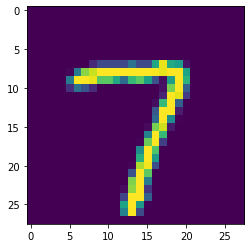

In [ ]:
plt.imshow(x_train[5100]) 

In [ ]:
np.argmax(y_train[5100])

0

In [ ]:
#Reshaping to format which CNN expects (batch, height, width, channels)
x_train=x_train.reshape (60000, 28, 28, 1).astype('float32')
x_test=x_test.reshape (10000, 28, 28, 1).astype ('float32')

Applying One Hot Encoding

In [ ]:
number_of_classes = 10  #storing the no of classes in a variable
y_train = np_utils.to_categorical (y_train, number_of_classes) #converts the output in binary format
y_test = np_utils.to_categorical (y_test, number_of_classes)

Add CNN

In [ ]:
#create model
model=Sequential ()
#adding modeL Layer
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3, 3), activation = 'relu'))
#flatten the dimension of the image
model.add(Flatten())
#output layer with 10 neurons
model.add(Dense(number_of_classes,activation = 'softmax'))

Compiling the Model

In [ ]:
#Compile model
model.compile(loss= 'categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

Train the Model

In [ ]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 201s 107ms/step - loss: 0.2205 - accuracy: 0.9506 - val_loss: 0.0876 - val_accuracy: 0.9731
Epoch 2/5
1875/1875 [==============================] - 194s 103ms/step - loss: 0.0689 - accuracy: 0.9791 - val_loss: 0.0813 - val_accuracy: 0.9761
Epoch 3/5
1875/1875 [==============================] - 195s 104ms/step - loss: 0.0483 - accuracy: 0.9847 - val_loss: 0.0790 - val_accuracy: 0.9774
Epoch 4/5
1875/1875 [==============================] - 191s 102ms/step - loss: 0.0349 - accuracy: 0.9886 - val_loss: 0.0912 - val_accuracy: 0.9777
Epoch 5/5
1875/1875 [==============================] - 194s 104ms/step - loss: 0.0280 - accuracy: 0.9908 - val_loss: 0.1135 - val_accuracy: 0.9739


Observing the matrics

In [ ]:
# Final evaluation of the model
metrics = model.evaluate(x_test, y_test, verbose=0)
print("Metrics (Test loss &Test Accuracy) : ")
print(metrics)

Metrics (Test loss &Test Accuracy) : 
[0.11351565271615982, 0.9739000201225281]


Test the model

In [ ]:
prediction=model.predict(x_test[6000:6001])
print(prediction)

1/1 [==============================] - 0s 113ms/step
[[1.1066736e-14 3.4641613e-17 7.7495031e-14 4.1874117e-08 2.9867549e-06
  1.1530454e-07 7.0560840e-14 2.0476809e-06 5.5973055e-07 9.9999416e-01]]


In [ ]:
import numpy as np
print(np.argmax(prediction, axis=1)) #printing our Labels from first 4 images

[9]


In [ ]:
np.argmax(y_test[6000:6001]) #printing the actual labels

9

In [ ]:
# Save the model
model.save('models/mnistCNN.h5')

In [ ]:
cd models

/content/models


In [ ]:
!tar -zcvf hdr_deployment.tgz mnistCNN.h5

mnistCNN.h5


In [ ]:
ls -1

hdr_deployment.tgz
mnistCNN.h5


In [ ]:
!pip install watson-machine-learning-client --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 538 kB 4.2 MB/s 
     |████████████████████████████████| 55 kB 2.8 MB/s 
     |████████████████████████████████| 132 kB 42.1 MB/s 
     |████████████████████████████████| 79 kB 6.1 MB/s 
     |████████████████████████████████| 9.9 MB 44.6 MB/s 
     |████████████████████████████████| 140 kB 53.6 MB/s 
     |████████████████████████████████| 956 kB 55.3 MB/s 
     |████████████████████████████████| 135 kB 63.3 MB/s 
     |████████████████████████████████| 62 kB 1.2 MB/s 
  Created wheel for ibm-cos-sdk: filename=ibm_cos_sdk-2.12.0-py3-none-any.whl size=73931 sha256=a5dbbe319554baeea0ef673bc46c963486e3ff6b07a7709f93cdf392d41d91f6
  Stored in directory: /root/.cache/pip/wheels/ec/94/29/2b57327cf00664b6614304f7958abd29d77ea0e5bbece2ea57
  Created wheel for ibm-cos-sdk-core: filename=ibm_cos_sdk_core-2.12.0-py3-none-any.whl size=562962 sha256=40f50943a8f

Cloud Deploy

In [1]:
!pip install ibm_watson_machine_learning

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 28.3 MB/s 
     |████████████████████████████████| 51 kB 662 kB/s 
     |████████████████████████████████| 824 kB 62.0 MB/s 
     |████████████████████████████████| 133 kB 60.9 MB/s 
     |████████████████████████████████| 547 kB 53.2 MB/s 
  Created wheel for ibm-cos-sdk: filename=ibm_cos_sdk-2.7.0-py2.py3-none-any.whl size=72563 sha256=2ebc18d47dc5f480d3e679cd456aa7d38b8237554486e46372ed546c7a4d9efc
  Stored in directory: /root/.cache/pip/wheels/47/22/bf/e1154ff0f5de93cc477acd0ca69abfbb8b799c5b28a66b44c2
  Created wheel for ibm-cos-sdk-core: filename=ibm_cos_sdk_core-2.7.0-py2.py3-none-any.whl size=501013 sha256=7f29b1138acc024ce1cf961f068576e87d730b22af68326b42973a9b6d3a3719
  Stored in directory: /root/.cache/pip/wheels/6c/a2/e4/c16d02f809a3ea998e17cfd02c13369281f3d232aaf5902c19
  Created wheel for ibm-cos-sdk-s3transfer: filename=ibm_cos

In [2]:
from ibm_watson_machine_learning import APIClient
wml_credentials ={
    "url": "https://us-south.ml.cloud.ibm.com",
    "apikey": "Hdvw0ignZYYKr51W7IXQrB5S5mFLzABe5u1kGFcRACAJ"
}
client = APIClient(wml_credentials)

Python 3.7 and 3.8 frameworks are deprecated and will be removed in a future release. Use Python 3.9 framework instead.


In [3]:
def guid_from_space_name(client, space_name):
    space=client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']["name"] == space_name)['metadata']['id'])

In [4]:
space_uid=guid_from_space_name(client,'ImageClassification')
print("Space UID = "+space_uid)

Space UID = 4450ba15-2813-4438-b303-6bb769f9b92e


In [5]:
client.set.default_space(space_uid)

'SUCCESS'

In [6]:
client.repository.download('81900656-bdb2-4bdf-a1ad-2caa9058565a', "digit-rec-model_download.tgz")

Successfully saved model content to file: 'digit-rec-model_download.tgz'


'/content/digit-rec-model_download.tgz'